# **Reading Data & Importing Dependencies**

In [1]:
import pandas as pd
import numpy as np
from gensim.models import Word2Vec
from gensim.models import KeyedVectors
from gensim.models import Phrases
from gensim.models.phrases import Phraser

In [2]:
data = pd.read_csv("processed_data.csv")
data.head()

,Class,Cleaned_Text
0,Vaccine Challenges,faints from mild pain by the way a ton of girl...
1,Vaccine Challenges,painislife said not saying that is not the cas...
2,Consumer Experience,goldenwolf87 said i wonder how much more commo...
3,Consumer Experience,travelnomad said hpv herpes can be contracted ...
4,Consumer Experience,louisiana fisher said im sitting there playing...


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18283 entries, 0 to 18282
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Class         18283 non-null  object
 1   Cleaned_Text  18204 non-null  object
dtypes: object(2)
memory usage: 285.8+ KB


In [4]:
data.dropna(inplace=True)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18204 entries, 0 to 18282
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Class         18204 non-null  object
 1   Cleaned_Text  18204 non-null  object
dtypes: object(2)
memory usage: 426.7+ KB


In [6]:
sent_of_train=[]
for sent in data["Cleaned_Text"]:
    sent_of_train.append(sent.split())

In [20]:
sent_of_train[:1]

[['faints',
  'from',
  'mild',
  'pain',
  'by',
  'the',
  'way',
  'a',
  'ton',
  'of',
  'girls',
  'pass',
  'out',
  'from',
  'the',
  'hpv',
  'vaccine',
  'as',
  'well']]

# **Custom Embeddings using Gensim**

In [21]:
## Train the genisim word2vec model with our own custom corpus
## Uni-grams
model = Word2Vec(sent_of_train, min_count=1,size= 50,workers=3, window =3, sg = 1)

In [22]:
model.wv.vocab

{'faints': <gensim.models.keyedvectors.Vocab at 0x7f5baa14d710>,
 'from': <gensim.models.keyedvectors.Vocab at 0x7f5bad393f10>,
 'mild': <gensim.models.keyedvectors.Vocab at 0x7f5ba4761f10>,
 'pain': <gensim.models.keyedvectors.Vocab at 0x7f5ba47c0ed0>,
 'by': <gensim.models.keyedvectors.Vocab at 0x7f5ba47c3090>,
 'the': <gensim.models.keyedvectors.Vocab at 0x7f5ba76e6510>,
 'way': <gensim.models.keyedvectors.Vocab at 0x7f5ba475a550>,
 'a': <gensim.models.keyedvectors.Vocab at 0x7f5ba475ae90>,
 'ton': <gensim.models.keyedvectors.Vocab at 0x7f5ba47c0e90>,
 'of': <gensim.models.keyedvectors.Vocab at 0x7f5ba47c3f50>,
 'girls': <gensim.models.keyedvectors.Vocab at 0x7f5ba475ad50>,
 'pass': <gensim.models.keyedvectors.Vocab at 0x7f5ba475af10>,
 'out': <gensim.models.keyedvectors.Vocab at 0x7f5ba475a210>,
 'hpv': <gensim.models.keyedvectors.Vocab at 0x7f5ba475acd0>,
 'vaccine': <gensim.models.keyedvectors.Vocab at 0x7f5ba475a890>,
 'as': <gensim.models.keyedvectors.Vocab at 0x7f5ba475a6d0>,


In [23]:
model.most_similar('discomfort')[:10]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.


[('slight', 0.938279390335083),
 ('traumatic', 0.9280166029930115),
 ('tiny', 0.9249569773674011),
 ('comfortable', 0.9239786267280579),
 ('unpleasant', 0.921847939491272),
 ('slightly', 0.9214370846748352),
 ('usual', 0.9203593134880066),
 ('red', 0.9189444184303284),
 ('rough', 0.9189364910125732),
 ('longer', 0.9175913333892822)]

In [27]:
model.most_similar('cancer')[:10]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.


[('cancers', 0.8451359868049622),
 ('ovarian', 0.8164112567901611),
 ('precancer', 0.8054631352424622),
 ('penile', 0.7992376089096069),
 ('lung', 0.79891437292099),
 ('mouth', 0.7954577803611755),
 ('neck', 0.7927511930465698),
 ('smoking', 0.7889454364776611),
 ('behavior', 0.7868910431861877),
 ('cysts', 0.7868539094924927)]

In [10]:
## For Most Similar Bi-grams
bigram = Phrases(sent_of_train, min_count=1, threshold=2)

In [12]:
model = Word2Vec(bigram[sent_of_train], size=50, min_count=3, iter=20)

/usr/local/lib/python3.7/dist-packages/gensim/models/phrases.py:598: UserWarning: For a faster implementation, use the gensim.models.phrases.Phraser class
  warnings.warn("For a faster implementation, use the gensim.models.phrases.Phraser class")


In [19]:
model.wv.most_similar("smear") # Not Useful Approach

[('smear_done', 0.8847590088844299),
 ('smear_today', 0.8189737796783447),
 ('smear_tomorrow', 0.7154666185379028),
 ('smear_bc', 0.7118510007858276),
 ('test_done', 0.7080943584442139),
 ('smear_results', 0.7077674865722656),
 ('smears', 0.6780526041984558),
 ('test_today', 0.6718747615814209),
 ('can_request', 0.6517634391784668),
 ('swab', 0.6495271325111389)]

In [41]:
!pip install top2vec

     |████████████████████████████████| 6.4MB 7.9MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 81kB 11.8MB/s 
  Using cached https://files.pythonhosted.org/packages/a5/42/560d269f604d3e186a57c21a363e77e199358d054884e61b73e405dd217c/numpy-1.20.3-cp37-cp37m-manylinux_2_12_x86_64.manylinux2010_x86_64.whl
     |████████████████████████████████| 1.2MB 48.7MB/s 
  Created wheel for hdbscan: filename=hdbscan-0.8.27-cp37-cp37m-linux_x86_64.whl size=2311650 sha256=8287c34cbacb15ccdcc84ae2218dcae2696e6d3a8334b586eb76b0ed3995514e
  Stored in directory: /root/.cache/pip/wheels/42/63/fb/314ad6c3b270887a3ecb588b8e5aac50b0fad38ff89bb6dff2
Successfully built hdbscan
  Created wheel for umap-learn: filename=umap_learn-0.5.1-cp37-none-any.whl size=76569 sha256=84c5a22224befae5ea4e951a34ac3fcee1f00e5708ea3ef353a18d46911f1d48
  Stored in directory: /root/.cache/pip/wheels/ad/df/d5/

# **Custom Embeddings using Top2Vec**

In [12]:
import ipywidgets as widgets
from IPython.display import clear_output, display
from top2vec import Top2Vec

In [13]:
top2vec = Top2Vec(documents=data["Cleaned_Text"].values, speed="learn", workers=4)

2021-06-06 06:44:19,187 - top2vec - INFO - Pre-processing documents for training
2021-06-06 06:44:20,692 - top2vec - INFO - Creating joint document/word embedding
2021-06-06 06:45:43,027 - top2vec - INFO - Creating lower dimension embedding of documents
2021-06-06 06:46:03,159 - top2vec - INFO - Finding dense areas of documents
2021-06-06 06:46:05,521 - top2vec - INFO - Finding topics


# **Finding Similar Words**

In [8]:

keywords_select_sw = widgets.Label('Enter keywords seperated by space: ')
display(keywords_select_sw)

keywords_input_sw = widgets.Text()
display(keywords_input_sw)

keywords_neg_select_sw = widgets.Label('Enter negative keywords seperated by space: ')
display(keywords_neg_select_sw)

keywords_neg_input_sw = widgets.Text()
display(keywords_neg_input_sw)


doc_num_select_sw = widgets.Label('Choose number of words: ')
display(doc_num_select_sw)

doc_num_input_sw = widgets.Text(value='20')
display(doc_num_input_sw)

def display_similar_words(*args):
    
    clear_output()
    display(keywords_select_sw)
    display(keywords_input_sw)
    display(keywords_neg_select_sw)
    display(keywords_neg_input_sw)
    display(doc_num_select_sw)
    display(doc_num_input_sw)
    display(sim_word_btn_sw)
    
    try:            
        words, word_scores = top2vec.similar_words(keywords=keywords_input_sw.value.split(), keywords_neg=keywords_neg_input_sw.value.split(), num_words=int(doc_num_input_sw.value))
        for word, score in zip(words, word_scores):
            print(f"{word} {score}")
   
    except Exception as e:
        print(e)
        
sim_word_btn_sw = widgets.Button(description="show similar words")
display(sim_word_btn_sw)
sim_word_btn_sw.on_click(display_similar_words)

Label(value='Enter keywords seperated by space: ')

Text(value='cancer vaccine')

Label(value='Enter negative keywords seperated by space: ')

Text(value='place night')

Label(value='Choose number of words: ')

Text(value='20')

Button(description='show similar words', style=ButtonStyle())

against 0.4337509950994696
protects 0.42715647575802806
developing 0.3919917258154868
including 0.3806434990081976
strains 0.3794694170450601
science 0.35089503062974814
vaccines 0.3504073506412656
preventable 0.3487372326879322
can 0.3480024016775769
types 0.3458399791110416
hpv 0.3457406211301296
prevent 0.3446898990635452
diseases 0.3417073558695676
linked 0.3410051208195466
viruses 0.33838662210560433
shingles 0.32533554545839394
who 0.3239047586496818
certain 0.3225059075324889
cases 0.32072915784730915
effective 0.31809332958660164


# **Topic Search By Keywords**

In [14]:
keywords_select_st = widgets.Label('Enter keywords seperated by space: ')
display(keywords_select_st)

keywords_input_st = widgets.Text()
display(keywords_input_st)

keywords_neg_select_st = widgets.Label('Enter negative keywords seperated by space: ')
display(keywords_neg_select_st)

keywords_neg_input_st = widgets.Text()
display(keywords_neg_input_st)

doc_num_select_st = widgets.Label('Choose number of topics: ')
display(doc_num_select_st)

doc_num_input_st = widgets.Text(value='5')
display(doc_num_input_st)

def display_similar_topics(*args):
    
    clear_output()
    display(keywords_select_st)
    display(keywords_input_st)
    display(keywords_neg_select_st)
    display(keywords_neg_input_st)
    display(doc_num_select_st)
    display(doc_num_input_st)
    display(keyword_btn_st)
    
    try:
        topic_words, word_scores, topic_scores, topic_nums = top2vec.search_topics(keywords=keywords_input_st.value.split(),num_topics=int(doc_num_input_st.value), keywords_neg=keywords_neg_input_st.value.split())
        for topic in topic_nums:
            top2vec.generate_topic_wordcloud(topic, background_color="black")
        
    except Exception as e:
        print(e)
        
keyword_btn_st = widgets.Button(description="show topics")
display(keyword_btn_st)
keyword_btn_st.on_click(display_similar_topics)

Output hidden; open in https://colab.research.google.com to view.

# **Using KeyBert**

In [16]:
!pip install keybert[all]

  Using cached https://files.pythonhosted.org/packages/db/fb/822e7094457cd16319291e34aa97b2ef97620da01af94fe557e96a8cc6b9/keybert-0.3.0.tar.gz
  Using cached https://files.pythonhosted.org/packages/cc/75/df441011cd1726822b70fbff50042adb4860e9327b99b346154ead704c44/sentence-transformers-1.2.0.tar.gz
     |████████████████████████████████| 776.8MB 23kB/s 
     |████████████████████████████████| 450kB 8.7MB/s 
     |████████████████████████████████| 12.8MB 259kB/s 
     |████████████████████████████████| 4.3MB 40.6MB/s 
     |████████████████████████████████| 2.3MB 27.5MB/s 
     |████████████████████████████████| 1.2MB 40.4MB/s 
     |████████████████████████████████| 983kB 41.2MB/s 
     |████████████████████████████████| 71kB 10.5MB/s 
     |████████████████████████████████| 798kB 49.4MB/s 
     |████████████████████████████████| 19.7MB 1.3MB/s 
     |████████████████████████████████| 460kB 54.0MB/s 
     |████████████████████████████████| 51kB 7.5MB/s 
     |██████████████████████████

In [21]:
# converting ;Cleaned_Text' column into list
a = list(data['Cleaned_Text'])
  
# converting list into string and then joining it with space
b = ' '.join(str(e) for e in a)

In [20]:
print(b[2000000:])

up sterilizing millions of african women use your money and media machine to cover seanhannity kayleighmcenany gopchairwoman i would rather have a pap smear by freddy krueger than watch your fucking show i think the only time i have had a call telling me everything is fine is from a pap smear and that was because i did not need to schedule a followup appointment unless something was wrong for pregnancy stuff they have always just waited until my next appointment to talk about my test results i also got my 2nd hpv booster because if my teenage sons are getting it i will too ive never had two days of pain from a pap smear usually just for a few hours afterwards maybe you should call your doctor and let them know just in case i have also never had any pain from a pap smear i second or third the idea that you should contact your doctor i have never had any pain after a pap smear it is a little uncomfortable but not painful even when i had a doctor who was hamfisted hopefully next time you 

In [20]:
from keybert import KeyBERT
kw_model = KeyBERT('distilbert-base-nli-mean-tokens')

In [5]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [10,10]
plt.rcParams['figure.dpi'] = 80

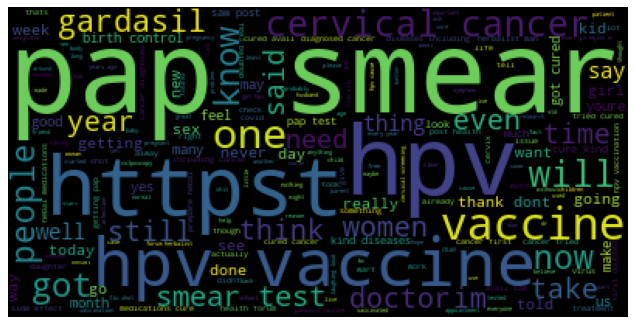

In [25]:
word_cloud = WordCloud(max_font_size=100).generate(b)
plt.imshow(word_cloud)
plt.axis('off')
plt.show()

In [ ]:
# kw_model.extract_keywords(b, keyphrase_ngram_range=(3, 3), stop_words='english', 
#                               use_maxsum=True, nr_candidates=20, top_n=5)
# Not able to run this code snippet for refined results, due to less computational resources

In [8]:
kw_model.extract_keywords(b, keyphrase_ngram_range=(1, 4), stop_words="english")

[('women rare vaccinated hpv', 0.7227),
 ('hpv vaccine whoops women', 0.7037),
 ('girls vaccinated human papillomavirus', 0.7035),
 ('women vaccinated human papillomavirus', 0.6911),
 ('girls pass hpv vaccine', 0.688)]

In [ ]:
kw_model.extract_keywords(b, keyphrase_ngram_range=(1, 3), stop_words="english")